# Performance analysis

## Stock list

In [52]:
# All changable variables
rf = 0.04 / 252  # For sharp ratio calculation
beta = 1  # For Treynor ratio calculation
portfolio_start_size = 1000800  # Portfolio size

# yfinance download date
start_date = "2025-01-31"
end_date = "2025-04-22"
liberation_date = "2025-04-02"  # tariffs day

In [53]:
import pandas as pd

stock_list = pd.read_excel("data/stock_list.xlsx", index_col=0)
stock_list[["Industry", "Weight", "Target Weight", "Shares", "Transaction Cost"]]

,Industry,Weight,Target Weight,Shares,Transaction Cost
Company,,,,,
Apple,Information technology,0.0408,0.0409,173.0000,81.6560
Amgen,Biopharmaceutical,0.0000,0.0000,0.0000,0.0000
Amazon,Retailing,0.0000,0.0000,0.0000,0.0000
American Express,Financial services,0.0419,0.0418,132.0000,83.8068
Boeing,Aerospace and defense,0.0222,0.0223,126.0000,44.4830
Caterpillar,Construction and mining,0.0898,0.0902,242.0000,179.7770
Salesforce,Information technology,0.0000,0.0000,0.0000,0.0000
Cisco,Information technology,0.0000,0.0000,0.0000,0.0000
Chevron,Petroleum industry,0.0999,0.1000,670.0000,199.9146


### Stock allocations

- No short selling allowed
- Maximum 10% of portfolio in a single stock

<Axes: ylabel='Weight'>

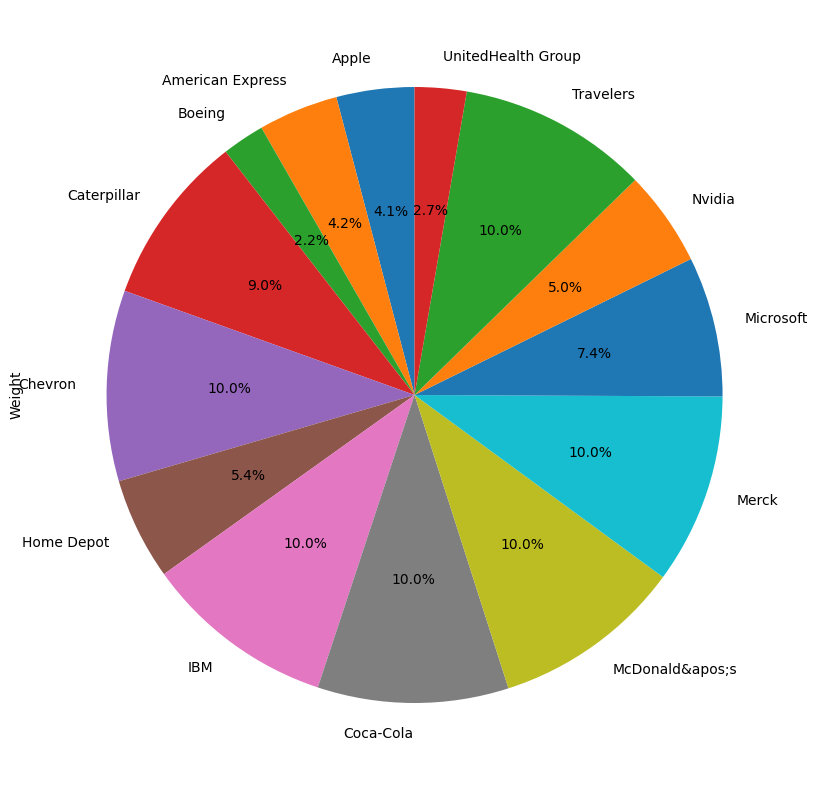

In [54]:
# weights of the portfolio - pie chart
weights = stock_list[stock_list['Weight'] > 0]["Weight"].drop("13 WEEK TREASURY BILL")
weights.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), startangle=90, legend=False)

### Industry allocations

<Axes: ylabel='Weight'>

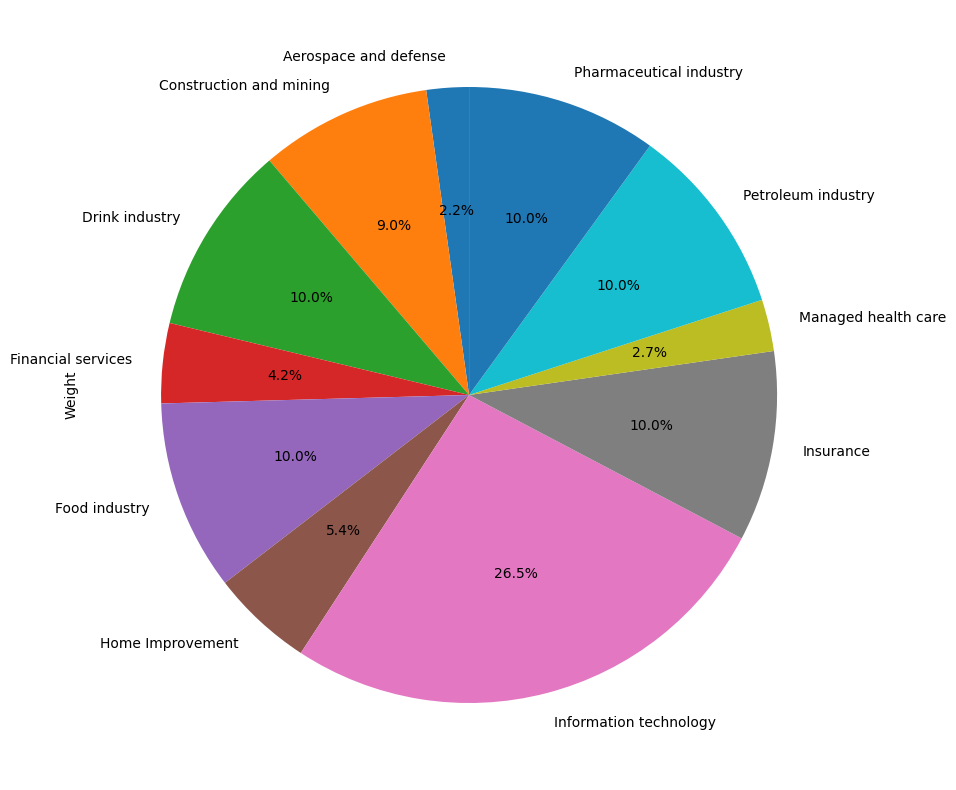

In [55]:
# weights on industry level - bar chart
industry_weights = stock_list.drop("13 WEEK TREASURY BILL").groupby('Industry')['Weight'].sum()
zero_weights = industry_weights[industry_weights == 0]
industry_weights = industry_weights[industry_weights > 0]
industry_weights.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), startangle=90, legend=False)

Zero allocation to the following industries:

In [56]:
zero_weights

Industry
Biopharmaceutical                0.0000
Broadcasting and entertainment   0.0000
Clothing industry                0.0000
Conglomerate                     0.0000
Fast-moving consumer goods       0.0000
Retailing                        0.0000
Speciality chemicals             0.0000
Telecommunications industry      0.0000
Name: Weight, dtype: float64

## Performance metrics

### Download daily price data (Close)

- stock price
- DJIA index

In [57]:
import yfinance as yf

# download stock data
stock_data = yf.download(tickers=stock_list["Symbol"].tolist(), start=start_date, end=end_date)  # type: ignore
# print out level 1 column names
stock_data: pd.DataFrame = stock_data["Close"]  # type: ignore
# Adjuste t-bill to accumulate
stock_data["^IRX"] = stock_data["^IRX"] / 252 / 100
stock_data["^IRX"] = (stock_data["^IRX"] + 1).cumprod()
# Show first and last day of the data
stock_data.iloc[[0, -2, -1], :].T.tail(3)  # type: ignore

[*********************100%***********************]  31 of 31 completed


Date,2025-01-31,2025-04-17,2025-04-21
Ticker,,,
VZ,38.7673,44.0400,42.9300
WMT,97.8912,93.2200,92.4100
^IRX,1.0002,1.0090,1.0092


In [58]:
# DJIA index
djia = yf.download('^DJI', start=start_date, end=end_date)  # type: ignore
djia: pd.DataFrame = djia['Close']  # type: ignore
djia.iloc[[0, -1], :].T  # type: ignore


[*********************100%***********************]  1 of 1 completed


Date,2025-01-31,2025-04-21
Ticker,,
^DJI,44544.6602,38170.4102


### Accumulated returns

Text(1, -13.80979600616762, '-14.31%')

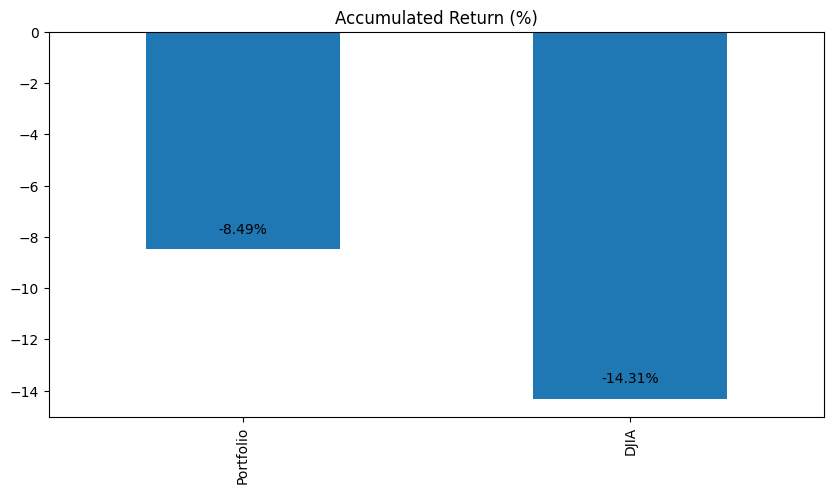

In [59]:
stock_returns = (stock_data.iloc[-1] / stock_data.iloc[0] - 1)
djia_return = (djia.iloc[-1] / djia.iloc[0] - 1)
portfolio_return = (stock_returns * stock_list["Weight"].values).sum()

# show percentage on the plot

accumulated_return = pd.Series({
    "Portfolio": portfolio_return * 100,
    "DJIA": djia_return.values[0] * 100,
}, name="Accumulated Return (%)")

accumulated_return.plot(kind='bar', figsize=(10, 5), title="Accumulated Return (%)")
# show percentage on the plot
import matplotlib.pyplot as plt
plt.text(0, portfolio_return * 100 + 0.5, f"{portfolio_return * 100:.2f}%", ha='center', va='bottom')
plt.text(1, djia_return.values[0] * 100 + 0.5, f"{djia_return.values[0] * 100:.2f}%", ha='center', va='bottom')

Time series plot of accumulated returns

Text(2025-04-01 00:00:00, -16, 'Liberation Date')

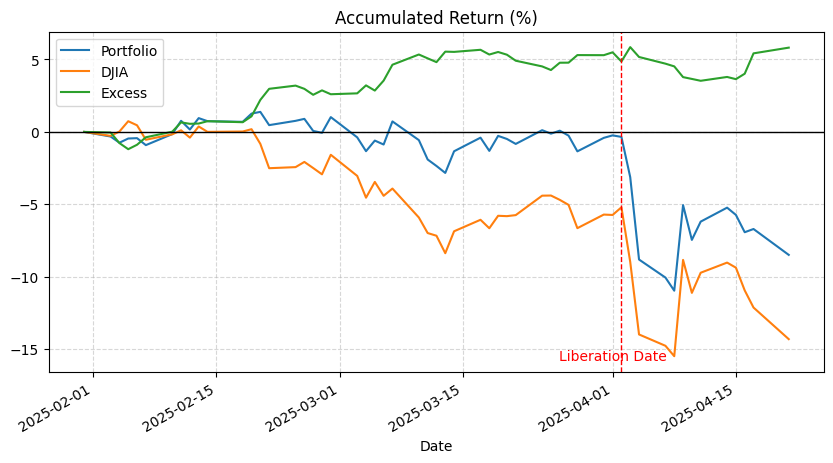

In [60]:
djia_accumulated = djia / djia.iloc[0] - 1
portfolio_accumulated_returns = (stock_data / stock_data.iloc[0] - 1).dot(stock_list["Weight"].values)

# plot accumulated returns
accumulated = pd.concat([portfolio_accumulated_returns * 100, djia_accumulated * 100], axis=1)
accumulated.columns = ["Portfolio", "DJIA"]
accumulated["Excess"] = accumulated["Portfolio"] - accumulated["DJIA"]
# add horizontal line at 0, vertical line at liberation date (dash)
accumulated.plot(figsize=(10, 5), title="Accumulated Return (%)", legend=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='black', lw=1)
plt.axvline(pd.to_datetime(liberation_date), color='red', lw=1, ls='--')  # type: ignore
plt.text(pd.to_datetime("2025-04-01"), -16, "Liberation Date", ha='center', va='bottom', color='red')  # type: ignore

### T test for excess returns

Excess returns (log daily returns) = portfolio returns - DJIA index returns 

In [61]:
import numpy as np
djia_log_returns: pd.DataFrame = np.log(djia / djia.shift(1)).dropna()  # type: ignore
portfolio_log_returns: pd.Series = np.log((portfolio_accumulated_returns + 1) / (portfolio_accumulated_returns + 1).shift(1)).dropna()  # type: ignore

log_returns = pd.concat([portfolio_log_returns, djia_log_returns], axis=1)
log_returns.columns = ["Portfolio", "DJIA"]
log_returns["Excess"] = log_returns["Portfolio"] - log_returns["DJIA"]
log_returns.describe()

,Portfolio,DJIA,Excess
count,54.0000,54.0000,54.0000
mean,-0.0016,-0.0029,0.0012
std,0.0155,0.0173,0.0054
min,-0.0605,-0.0566,-0.0115
25%,-0.0089,-0.0101,-0.0025
50%,-0.0021,-0.0028,0.0002
75%,0.0069,0.0049,0.0050
max,0.0643,0.0758,0.0158


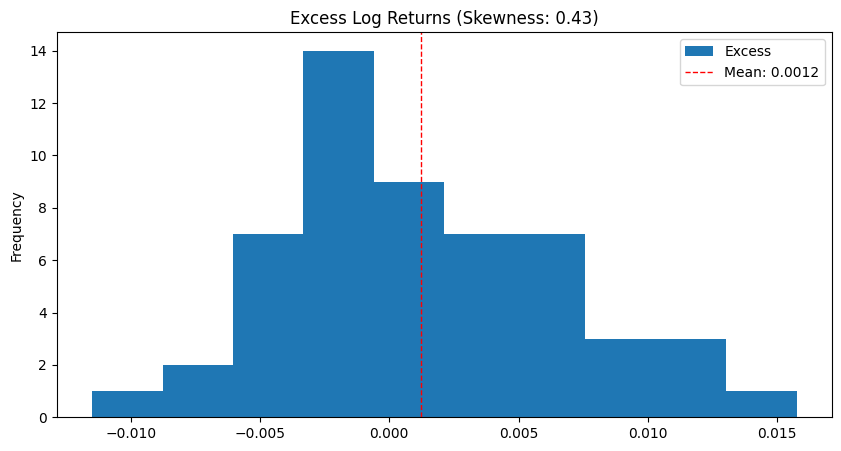

In [62]:
# Skewness
from scipy.stats import skew
skewness = skew(log_returns["Excess"])
mean_excess_returns = log_returns["Excess"].mean()
log_returns["Excess"].plot(kind='hist', figsize=(10, 5), title=f"Excess Log Returns (Skewness: {skewness:.2f})")
# add vertical line for mean
plt.axvline(mean_excess_returns, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_excess_returns:.4f}')
plt.legend()


 t test for excess returns
- Null hypothesis: excess returns = 0
- Alternative hypothesis: excess returns > 0

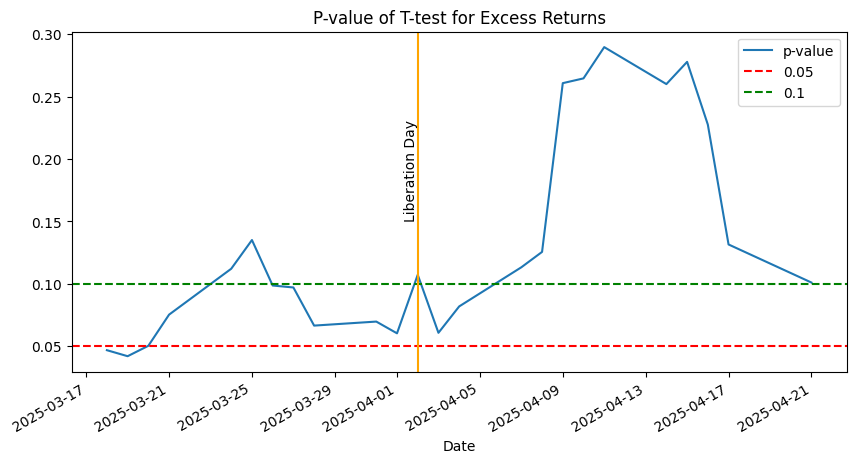

In [63]:
# t test for excess returns
from scipy import stats

t_test_results = pd.DataFrame(columns=["T-statistic", "P-value"], index=log_returns.index[30:])

for end_date in log_returns.index[30:]:
    t_stat, p_value = stats.ttest_1samp(log_returns["Excess"][:end_date], 0)
    t_test_results.loc[end_date] = [t_stat, p_value]
    
t_test_results = t_test_results.astype(float)
t_test_results["P-value"].plot(kind='line', figsize=(10, 5), title="P-value of T-test for Excess Returns")
plt.axhline(y=0.05, color='r', linestyle='--')
plt.axhline(y=0.1, color='g', linestyle='--')
# add tariffs day 2025-04-03 vertical line
plt.axvline(x=pd.to_datetime(liberation_date), color='orange', linestyle='-')  # type: ignore
plt.text(pd.to_datetime(liberation_date), 0.15, "Liberation Day", rotation=90, verticalalignment='bottom', horizontalalignment='right')  # type: ignore
plt.legend(["p-value", "0.05", "0.1"])

In [64]:
# Tariffs period t test
t_stat, p_value = stats.ttest_1samp(log_returns["Excess"]["2025-04-03":], 0)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.6027633077774049, P-value: 0.5588879894355551


In [65]:
# Excess returns pre and post tariffs and total
mean_excess_returns = pd.DataFrame(columns=["Pre-Tariffs", "Post-Tariffs", "Total"], index=["Mean", "Std", "T-statistic", "P-value"])
mean_excess_returns.loc["Mean"] = [
    log_returns["Excess"][:"2025-04-03"].mean(),
    log_returns["Excess"]["2025-04-03":].mean(),
    log_returns["Excess"].mean()
]
mean_excess_returns.loc["Std"] = [
    log_returns["Excess"][:"2025-04-03"].std(),
    log_returns["Excess"]["2025-04-03":].std(),
    log_returns["Excess"].std()
]
mean_excess_returns.loc["T-statistic"] = [
    stats.ttest_1samp(log_returns["Excess"][:"2025-04-03"], 0)[0],
    stats.ttest_1samp(log_returns["Excess"]["2025-04-03":], 0)[0],
    stats.ttest_1samp(log_returns["Excess"], 0)[0]
]
mean_excess_returns.loc["P-value"] = [
    stats.ttest_1samp(log_returns["Excess"][:"2025-04-03"], 0)[1],
    stats.ttest_1samp(log_returns["Excess"]["2025-04-03":], 0)[1],
    stats.ttest_1samp(log_returns["Excess"], 0)[1]
]
mean_excess_returns = mean_excess_returns.astype(float)
mean_excess_returns


,Pre-Tariffs,Post-Tariffs,Total
Mean,0.0014,0.0013,0.0012
Std,0.0049,0.0075,0.0054
T-statistic,1.9279,0.6028,1.6694
P-value,0.0606,0.5589,0.1009


## Ratios

- Sharpe ratio
- Sortino ratio
- Calmar ratio
- Treynor ratio
- Max drawdown

In [66]:
from scipy.stats import norm

def sharpe(returns: pd.Series, risk_free_rate: float = 0.0) -> float:
    """
    Calculate the Sharpe ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :param risk_free_rate: The risk-free rate (default is 0.0).
    :return: The Sharpe ratio.
    """
    excess_returns = returns - risk_free_rate
    _sharpe = excess_returns.mean() / excess_returns.std()
    # annualize the Sharpe ratio
    return _sharpe * np.sqrt(252)

def sortino(returns: pd.Series, target: float = 0.0) -> float:
    """
    Calculate the Sortino ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :param target: The target return (default is 0.0).
    :return: The Sortino ratio.
    """
    downside_returns = returns[returns < target]
    _sortino = (returns.mean() - target) / downside_returns.std() if not downside_returns.empty else np.nan
    # annualize the Sortino ratio
    return _sortino * np.sqrt(252)

def max_drawdown(returns: pd.Series) -> float:
    """
    Calculate the maximum drawdown of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :return: The maximum drawdown.
    """
    # log returns
    cumulative_returns = returns.cumsum().apply(np.exp)
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def calmar(returns: pd.Series) -> float:
    """
    Calculate the Calmar ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :return: The Calmar ratio.
    """
    mean_ = returns.mean() * 252
    return mean_ / abs(max_drawdown(returns)) if max_drawdown(returns) != 0 else np.nan
    


def omega(returns: pd.Series, target: float = 0.0) -> float:
    """
    Calculate the Omega ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :param target: The target return (default is 0.0).
    :return: The Omega ratio.
    """
    gain = returns[returns > target].sum()
    loss = abs(returns[returns < target].sum())
    return gain / loss if loss != 0 else np.nan

def treynor(returns: pd.Series, beta: float) -> float:
    """
    Calculate the Treynor ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :param beta: The beta of the portfolio.
    :return: The Treynor ratio.
    """
    mean_ = returns.mean() * 252
    return (mean_ - 0.0) / beta if beta != 0 else np.nan

def information(returns: pd.Series, benchmark: pd.Series) -> float:
    """
    Calculate the Information ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :param benchmark: A pandas Series of benchmark returns.
    :return: The Information ratio.
    """
    active_return = returns - benchmark
    return active_return.mean() / active_return.std() * np.sqrt(252) if active_return.std() != 0 else np.nan
    
def compute_var(returns: pd.Series, confidence_level: float = 0.95, days: int = 1) -> float:
    mu = returns.mean()
    sigma = returns.std()
    z = abs(norm.ppf(1 - confidence_level))
    return -(mu * days + z * sigma * np.sqrt(days))  # expressed as positive value

# confidence levels and time horizons
var_labels = {
    "VaR_95_1d": (0.95, 1),
    "VaR_95_5d": (0.95, 5),
    "VaR_99_1d": (0.99, 1),
    "VaR_99_5d": (0.99, 5)
}

In [67]:
# Calculate the performance metrics for pre-tariffs post-tariffs and total
performance_matrics = pd.DataFrame(columns=["pre-tariffs", 
                                         "post-tariffs", 
                                         "total", 
                                         "DJIA-pre-tariffs",
                                         "DJIA-post-tariffs",
                                         "DJIA-total"
                                         ], 
                                         index=["Mean", "std", "Sharpe", "Sortino", "Max Drawdown", "Calmar", "Omega", "Treynor", "Information"])
performance_matrics.loc["Mean"] = [
    log_returns["Portfolio"][:"2025-04-03"].mean(),
    log_returns["Portfolio"]["2025-04-03":].mean(),
    log_returns["Portfolio"].mean(),
    log_returns["DJIA"][:"2025-04-03"].mean(),
    log_returns["DJIA"]["2025-04-03":].mean(),
    log_returns["DJIA"].mean()
]

performance_matrics.loc["std"] = [
    log_returns["Portfolio"][:"2025-04-03"].std(),
    log_returns["Portfolio"]["2025-04-03":].std(),
    log_returns["Portfolio"].std(),
    log_returns["DJIA"][:"2025-04-03"].std(),
    log_returns["DJIA"]["2025-04-03":].std(),
    log_returns["DJIA"].std()
]

performance_matrics.loc["Sharpe"] = [
    sharpe(log_returns["Portfolio"][:"2025-04-03"], rf),
    sharpe(log_returns["Portfolio"]["2025-04-03":], rf),
    sharpe(log_returns["Portfolio"], rf),
    sharpe(log_returns["DJIA"][:"2025-04-03"], rf),
    sharpe(log_returns["DJIA"]["2025-04-03":], rf),
    sharpe(log_returns["DJIA"], rf)

]
performance_matrics.loc["Sortino"] = [
    sortino(log_returns["Portfolio"][:"2025-04-03"]),
    sortino(log_returns["Portfolio"]["2025-04-03":]),
    sortino(log_returns["Portfolio"]),
    sortino(log_returns["DJIA"][:"2025-04-03"]),
    sortino(log_returns["DJIA"]["2025-04-03":]),
    sortino(log_returns["DJIA"])
]
performance_matrics.loc["Max Drawdown"] = [
    max_drawdown(log_returns["Portfolio"][:"2025-04-03"]),
    max_drawdown(log_returns["Portfolio"]["2025-04-03":]),
    max_drawdown(log_returns["Portfolio"]),
    max_drawdown(log_returns["DJIA"][:"2025-04-03"]),
    max_drawdown(log_returns["DJIA"]["2025-04-03":]),
    max_drawdown(log_returns["DJIA"])
]
performance_matrics.loc["Calmar"] = [
    calmar(log_returns["Portfolio"][:"2025-04-03"]),
    calmar(log_returns["Portfolio"]["2025-04-03":]),
    calmar(log_returns["Portfolio"]),
    calmar(log_returns["DJIA"][:"2025-04-03"]),
    calmar(log_returns["DJIA"]["2025-04-03":]),
    calmar(log_returns["DJIA"])
]
performance_matrics.loc["Omega"] = [
    omega(log_returns["Portfolio"][:"2025-04-03"]),
    omega(log_returns["Portfolio"]["2025-04-03":]),
    omega(log_returns["Portfolio"]),
    omega(log_returns["DJIA"][:"2025-04-03"]),
    omega(log_returns["DJIA"]["2025-04-03":]),
    omega(log_returns["DJIA"])
]
performance_matrics.loc["Treynor"] = [
    treynor(log_returns["Portfolio"][:"2025-04-03"], beta),
    treynor(log_returns["Portfolio"]["2025-04-03":], beta),
    treynor(log_returns["Portfolio"], beta),
    treynor(log_returns["DJIA"][:"2025-04-03"], beta),
    treynor(log_returns["DJIA"]["2025-04-03":], beta),
    treynor(log_returns["DJIA"], beta)
]
performance_matrics.loc["Information"] = [
    information(log_returns["Portfolio"][:"2025-04-03"], log_returns["DJIA"][:"2025-04-03"]),
    information(log_returns["Portfolio"]["2025-04-03":], log_returns["DJIA"]["2025-04-03":]),
    information(log_returns["Portfolio"], log_returns["DJIA"]),
    information(log_returns["DJIA"][:"2025-04-03"], log_returns["DJIA"][:"2025-04-03"]),
    information(log_returns["DJIA"]["2025-04-03":], log_returns["DJIA"]["2025-04-03":]),
    information(log_returns["DJIA"], log_returns["DJIA"])
]
for label, (cl, days) in var_labels.items():
    performance_matrics.loc[label] = [
        compute_var(log_returns["Portfolio"][:"2025-04-03"], cl, days),
        compute_var(log_returns["DJIA"][:"2025-04-03"], cl, days),
        compute_var(log_returns["Portfolio"]["2025-04-03":], cl, days),
        compute_var(log_returns["DJIA"]["2025-04-03":], cl, days),
        compute_var(log_returns["Portfolio"], cl, days),
        compute_var(log_returns["DJIA"], cl, days)
    ]

performance_matrics = performance_matrics.astype(float)
performance_matrics = performance_matrics[["pre-tariffs", "DJIA-pre-tariffs", "post-tariffs", "DJIA-post-tariffs", "total", "DJIA-total"]]
performance_matrics


,pre-tariffs,DJIA-pre-tariffs,post-tariffs,DJIA-post-tariffs,total,DJIA-total
Mean,-0.0007,-0.0022,-0.0071,-0.0084,-0.0016,-0.0029
std,0.0088,0.0109,0.0298,0.0330,0.0155,0.0173
Sharpe,-1.6176,-3.4273,-3.8656,-4.1253,-1.8459,-2.7670
Sortino,-1.9032,-3.8323,-6.4869,-7.8175,-2.2456,-3.7487
Max Drawdown,-0.0444,-0.0964,-0.0809,-0.0715,-0.1218,-0.1611
Calmar,-4.1835,-5.7159,-22.1288,-29.6391,-3.4005,-4.4744
Omega,0.8050,0.5719,0.5146,0.4951,0.7139,0.5926
Treynor,-0.1859,-0.5512,-1.7911,-2.1201,-0.4141,-0.7207
Information,4.6672,NaN,2.7622,NaN,3.6062,NaN
VaR_95_1d,-0.0137,-0.0458,-0.0157,-0.0238,-0.0420,-0.0256


In [68]:
# Save DJIA and portfolio data to csv
portfolio = (portfolio_accumulated_returns + 1) * portfolio_start_size
portfolio = portfolio.round(4)

output = pd.concat([portfolio, djia], axis=1)
output.columns = ["Portfolio", "DJIA"]
output.to_csv("data/portfolio_result.csv", index=True)

pd.set_option('display.float_format', '{:.4f}'.format)
output.tail()

,Portfolio,DJIA
Date,,
2025-04-14,948452.7259,40524.7891
2025-04-15,943436.5432,40368.9609
2025-04-16,931472.9673,39669.3906
2025-04-17,933696.0487,39142.2305
2025-04-21,915813.4581,38170.4102
